### Dataset Description:
The dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository. Columns of the dataset and their meaning are as follows;

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (text - little, moderate, rich)

Credit amount (numeric, in Deutsche Mark)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others

#### Skewness in Data

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [257]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
gcd=pd.read_csv(r"C:\Users\Nikhil\Downloads\german_credit_data (2).csv") #reading dataset

In [259]:
gcd.head() #getting peak of upper 5 observations

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [260]:
gcd.tail() #getting peak of lower 5 observations

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [261]:
gcd.shape #getting shape of dataframe

(1000, 10)

The dataset contains 1000 observations and 10 variables.

In [262]:
gcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 58.7+ KB


The dataset contains 10 variables of which two has missing values. 
Saving accounts and Checking account contains missing values.

In [263]:
gcd.isnull().sum() #checking number of null values

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

It can be seen, Saving accounts has 183 null values and Checking account has 394 null values.

### Handling Missing Values

In [264]:
gcd['Saving accounts'].values #to check the values of Saving accounts

array([nan, 'little', 'little', 'little', 'little', nan, 'quite rich',
       'little', 'rich', 'little', 'little', 'little', 'little', 'little',
       'little', 'moderate', nan, nan, 'little', 'quite rich', 'little',
       'quite rich', 'little', 'moderate', nan, 'little', 'little',
       'rich', 'little', 'little', 'rich', 'little', 'moderate', nan,
       'little', 'little', 'little', 'little', 'little', 'little',
       'quite rich', 'quite rich', 'little', 'moderate', 'little',
       'little', 'quite rich', 'quite rich', 'little', 'moderate', nan,
       'little', 'little', nan, 'little', nan, nan, 'little', 'little',
       'little', 'little', nan, 'little', 'little', 'little', nan,
       'little', 'rich', 'little', nan, 'little', nan, 'little', 'little',
       nan, 'little', 'little', 'little', nan, 'little', nan,
       'quite rich', 'moderate', 'little', 'little', 'little', 'little',
       'moderate', 'moderate', 'little', 'little', 'little', nan, nan,
       'rich', 'l

It can be seen, the null values are present in the Saving accounts.

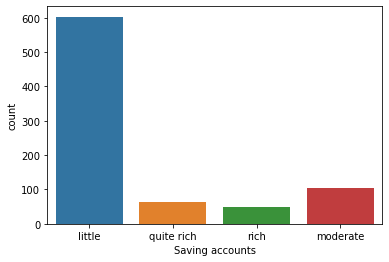

In [265]:
#To check the distribution of values in Saving accounts
sns.countplot(x='Saving accounts',data=gcd)
plt.show()

The 'little' in Saving accounts has maximum number of distribution. Hence, it is possible to use mode of the Saving accounts and fill the null values.

In [266]:
gcd['Saving accounts'].mode() #rechecking the mode of the Saving accounts variable

0    little
dtype: object

In [267]:
gcd['Saving accounts'].fillna('little',inplace=True) #Filling null values with the mode of the Saving accounts

In [268]:
gcd.info() #Checking the total values in the Saving accounts variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 58.7+ KB


It can be seen that there are no more missing or null values in the 

In [269]:
gcd['Saving accounts'].values #Rechecking if there are any missing or null values in Saving accounts

array(['little', 'little', 'little', 'little', 'little', 'little',
       'quite rich', 'little', 'rich', 'little', 'little', 'little',
       'little', 'little', 'little', 'moderate', 'little', 'little',
       'little', 'quite rich', 'little', 'quite rich', 'little',
       'moderate', 'little', 'little', 'little', 'rich', 'little',
       'little', 'rich', 'little', 'moderate', 'little', 'little',
       'little', 'little', 'little', 'little', 'little', 'quite rich',
       'quite rich', 'little', 'moderate', 'little', 'little',
       'quite rich', 'quite rich', 'little', 'moderate', 'little',
       'little', 'little', 'little', 'little', 'little', 'little',
       'little', 'little', 'little', 'little', 'little', 'little',
       'little', 'little', 'little', 'little', 'rich', 'little', 'little',
       'little', 'little', 'little', 'little', 'little', 'little',
       'little', 'little', 'little', 'little', 'little', 'quite rich',
       'moderate', 'little', 'little', 'little',

The null values in the Saving accounts variable have been handled with the mode of the Saving accounts and shown.

In [270]:
gcd['Checking account'].values #To check the values in the Current account

array(['little', 'moderate', nan, 'little', 'little', nan, nan,
       'moderate', nan, 'moderate', 'moderate', 'little', 'moderate',
       'little', 'little', 'little', nan, 'little', 'moderate', nan, nan,
       'little', 'little', 'moderate', nan, 'little', nan, 'rich',
       'moderate', 'little', 'moderate', 'little', 'moderate', nan,
       'rich', 'moderate', nan, 'rich', 'rich', 'moderate', nan,
       'moderate', 'moderate', 'little', 'little', nan, nan, 'little',
       nan, nan, 'moderate', 'moderate', nan, nan, 'moderate', nan,
       'moderate', nan, 'rich', 'little', 'moderate', 'moderate',
       'moderate', 'moderate', nan, nan, nan, 'moderate', nan, nan, nan,
       nan, 'little', 'moderate', 'little', 'little', 'little',
       'moderate', nan, 'moderate', nan, nan, nan, 'little', 'little',
       nan, 'moderate', 'moderate', 'little', 'little', nan, 'little',
       nan, 'rich', 'moderate', 'moderate', nan, 'moderate', 'moderate',
       'moderate', nan, 'moderate',

It can be seen that there are null values present in the Current account variable.

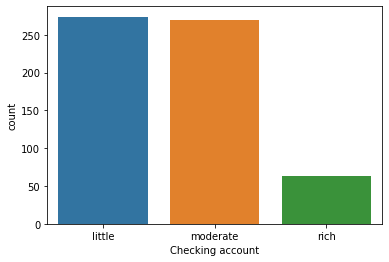

In [271]:
sns.countplot(x='Checking account', data=gcd) #To check the distribution of values in Current account
plt.show()

It can be seen that, the 'little' and 'moderate' has nearly same number of distribution. Filling null values with mode of the Checking account would not be possible.

Here, the Checking account, being the categorical data, has no contribution in the numerical relationship between other numerical variables hence it can be droped from the dataset. 

In [272]:
gcd_drop=gcd.drop(['Checking account','Unnamed: 0'],axis=1) #dropping The Checking account from dataset and unnecessary variables

In [273]:
gcd_drop.info() #Checing if the dataset has Checking account

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  1000 non-null   object
 5   Credit amount    1000 non-null   int64 
 6   Duration         1000 non-null   int64 
 7   Purpose          1000 non-null   object
dtypes: int64(4), object(4)
memory usage: 46.9+ KB


All the missing values have been handled.
There are no missing values in the dataset now.

Here the Job variable is categorical but it has been read as numeric. So it must be changed to object data type.

In [274]:
gcd_drop['Job']=gcd_drop['Job'].map(str) #changing the data type of Job

In [275]:
gcd_drop.dtypes #Rechecking the data type of the variables

Age                 int64
Sex                object
Job                object
Housing            object
Saving accounts    object
Credit amount       int64
Duration            int64
Purpose            object
dtype: object

The data type of the Job variable has been corrected.

### Distribution of Numeric Variables

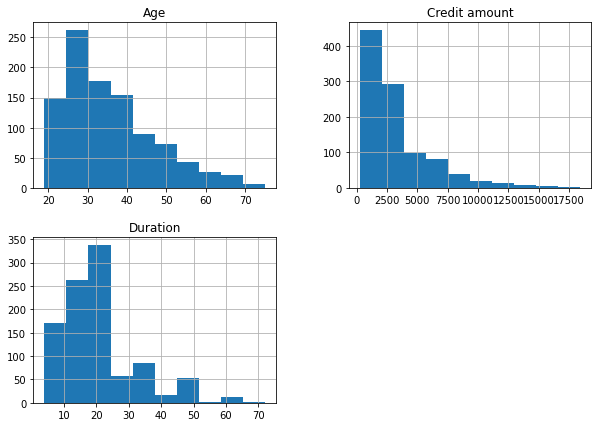

In [276]:
gcd_drop.hist(figsize=(10,7)) #Checking distribution of all numeric variables
plt.show()

From the distribution of numeric variables it can be seen that, all the numeric variable distribution are right skewed.

In [277]:
gcd_drop.skew() #To check the Skewness of the variable

Age              1.020739
Job             -0.374295
Credit amount    1.949628
Duration         1.094184
dtype: float64

##### Skewness in Data

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed If the skewness is less than -1 or greater than 1, the data are highly skewed.

| Variable | Skewness |
|---|---|
| Age | Highly Right Skewed |
| Credit amount | Highly Right Skewed |
| Duration | Highly Right Skewed |

#### Handling Skewed Numeric Data

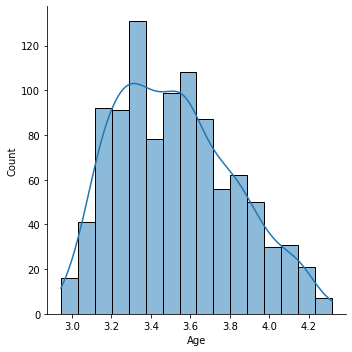

In [278]:
sns.displot(np.log(gcd_drop['Age']),kind='hist',kde=True) #Using log function to handle skewed Age data
plt.show()

In [279]:
np.log(gcd_drop['Age']).skew() #Skewness of variable after applying log function

0.41625371561149377

The distribution of the Age variable is now fairly symmetrical.

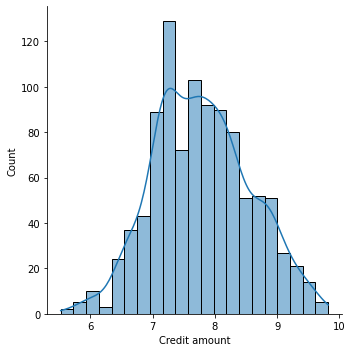

In [280]:
sns.displot(np.log(gcd_drop['Credit amount']),kind='hist',kde=True) #Using log function to handle skewed Credit amount data
plt.show()

In [281]:
np.log(gcd_drop['Credit amount']).skew() #Skewness of variable after applying log function

0.12928589230467

The distribution of the Credit amount variable is now fairly symmetrical.

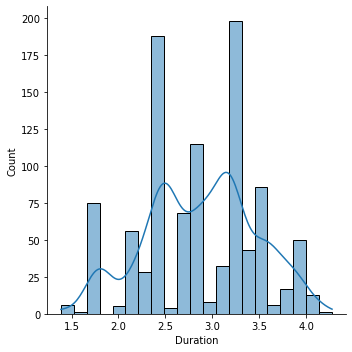

In [282]:
sns.displot(np.log(gcd_drop['Duration']),kind='hist',kde=True) #Using log function to handle skewed Duration data
plt.show()

In [283]:
np.log(gcd_drop['Duration']).skew() #Skewness of variable after applying log function

-0.1274144478919352

The distribution of the Duration variable is now fairly symmetrical.

##### Before and After Applying Log Function to Skewed Data

| Variable | Before Log Function | After Log Function |
|---|---|---|
| Age | Highly Right Skewed (1.02) | Fairly Symmetrical (0.41) |
| Credit amount | Highly Right Skewed (1.94) | Fairly Symmetrical (0.12) |
| Duration | Highly Right Skewed (1.09) | Fairly Symmetrical (-0.12) |

All the numeric highly skewed data have been handled.

### Outliers in Numeric Data

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


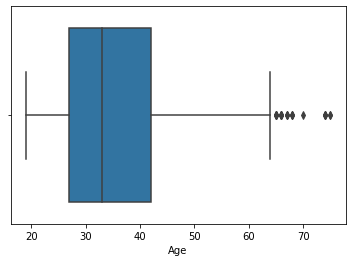

In [284]:
sns.boxplot(gcd_drop['Age']) #Plotting boxplot to see if variable contains any outliers
plt.show()

The variable Age contains outliers.

In [285]:
#Counting 5 point summary and handling the outliers in variable
Age_q1=np.quantile(gcd_drop['Age'],0.25)
Age_q2=np.quantile(gcd_drop['Age'],0.50)
Age_q3=np.quantile(gcd_drop['Age'],0.75)
Age_IQR=Age_q3 - Age_q1
Age_UpperWhisker= Age_q3+(Age_IQR*1.5)
Age_LowerWhisker= Age_q1-(Age_IQR*1.5)

In [286]:
gcd_drop['Age']= np.where(gcd_drop['Age']>Age_UpperWhisker,
                          Age_UpperWhisker,gcd_drop['Age']) #Calculationg and Removing Outliers

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


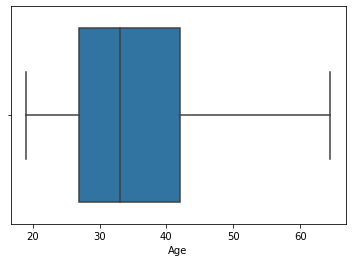

In [287]:
sns.boxplot(gcd_drop['Age']) #Plotting boxplot to see if there is still any outlier
plt.show()

It can be seen, the outliers in the variable Age have been handled.

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


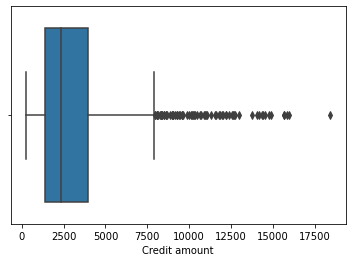

In [288]:
sns.boxplot(gcd_drop['Credit amount']) #Plotting boxplot to see if variable contains any outliers
plt.show()

The variable Age contains outliers.

In [289]:
#Counting 5 point summary and handling the outliers in variable
CreditAmount_q1=np.quantile(gcd_drop['Credit amount'],0.25)
CreditAmount_q2=np.quantile(gcd_drop['Credit amount'],0.50)
CreditAmount_q3=np.quantile(gcd_drop['Credit amount'],0.75)
CreditAmount_IQR=CreditAmount_q3 - CreditAmount_q1
CreditAmount_UpperWhisker= CreditAmount_q3+(CreditAmount_IQR*1.5)
CreditAmount_LowerWhisker= CreditAmount_q1-(CreditAmount_IQR*1.5)

In [290]:
gcd_drop['Credit amount']= np.where(gcd_drop['Credit amount']>CreditAmount_UpperWhisker, 
                          CreditAmount_UpperWhisker,gcd_drop['Credit amount']) #Calculationg and Removing Outliers

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


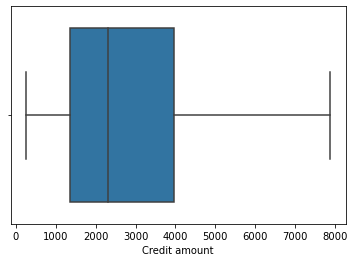

In [291]:
sns.boxplot(gcd_drop['Credit amount']) #Plotting boxplot to see if there is still any outlier
plt.show()

It can be seen, the outliers in the variable Credit amount have been handled.

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


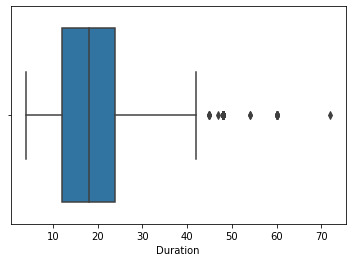

In [292]:
sns.boxplot(gcd_drop['Duration']) #Plotting boxplot to see if variable contains any outliers
plt.show()

The variable Age contains outliers.

In [293]:
#Counting 5 point summary and handling the outliers in variable
Duration_q1=np.quantile(gcd_drop['Duration'],0.25)
Duration_q2=np.quantile(gcd_drop['Duration'],0.50)
Duration_q3=np.quantile(gcd_drop['Duration'],0.75)
Duration_IQR=Duration_q3 - Duration_q1
Duration_UpperWhisker= Duration_q3+(Duration_IQR*1.5)
Duration_LowerWhisker= Duration_q1-(Duration_IQR*1.5)

In [294]:
gcd_drop['Duration']= np.where(gcd_drop['Duration']>Duration_UpperWhisker,
                               Duration_UpperWhisker,gcd_drop['Duration']) #Calculationg and Removing Outliers

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


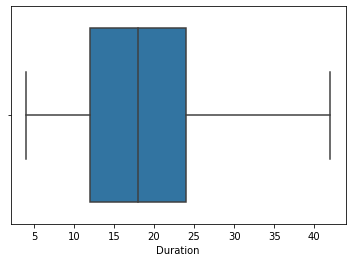

In [295]:
sns.boxplot(gcd_drop['Duration']) #Plotting boxplot to see if there is still any outlier
plt.show()

It can be seen, the outliers in the variable Duration have been handled.

### Distribution Of All Variables

##### Distribution of Numeric Variables

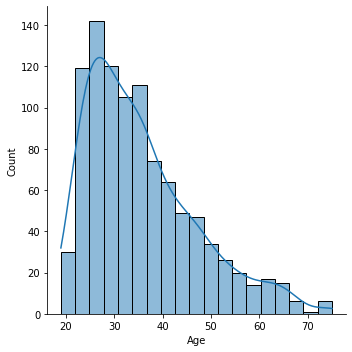

In [242]:
sns.displot(gcd['Age'],kind='hist',kde=True) #To Check distribution of variable
plt.show()

Here, the distribution of Age variable is shown.
It can be seen that, the age variable is highly distributed between age of 22 to 35, which results to right skewness.
This skewness of the Age variable has been handled previously by Log function.

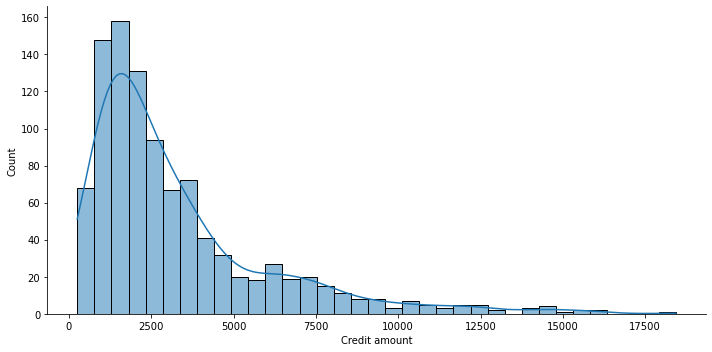

In [301]:
sns.displot(gcd['Credit amount'],kind='hist',kde=True,aspect=2) #To Check distribution of variable
plt.show()

Here, the distribution of Credit amount variable is shown.
It can be seen that, the Credit amount variable is highly distributed between amount of 1000 to 2500, which results to right skewness.
This skewness of the Credit amount variable has been handled previously by Log function.

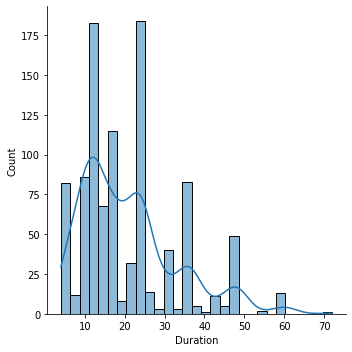

In [244]:
sns.displot(gcd['Duration'],kind='hist',kde=True) #To Check distribution of variable
plt.show()

Here, the distribution of Duration variable has shown.
It can be seen that, the Duration variable is varying highly between 12 to 22 months, which results to right skewness.
This skewness of the Duration variable has been handled previously by Log function.

##### Distribution of Categorical variables

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


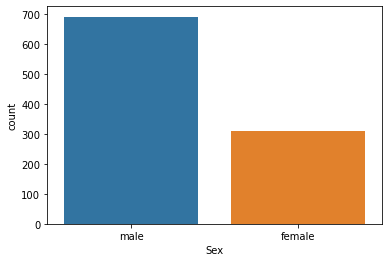

In [245]:
sns.countplot(gcd['Sex']) #To Check distribution of variable
plt.show()

The distribution of Sex variable is shown. The distribution of male is more than two times the distribution of female.

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


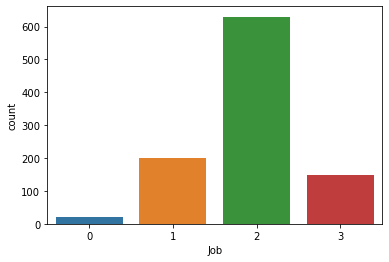

In [246]:
sns.countplot(gcd['Job']) #To Check distribution of variable
plt.show()

The distribution of Job variable is shown. It can be seen the distribution of 'Skilled' people is high, followed by 
'Unskilled and Resident', 'Highly Skilled' and 'Unskilled and Non-Resident' people.

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


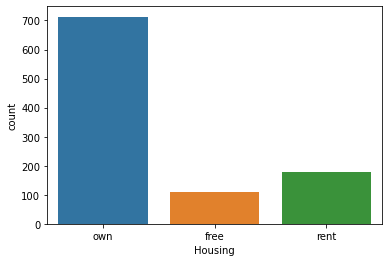

In [247]:
sns.countplot(gcd['Housing']) #To Check distribution of variable
plt.show()

The distribution of Housing variable is shown. The distribution of people who own house are high followed by the people living on rent and the free housing.

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


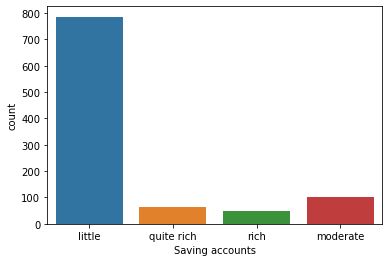

In [248]:
sns.countplot(gcd['Saving accounts']) #To Check distribution of variable
plt.show()

The distribution of Saving accounts variable is shown. The distribution of account with little savings are high followed by the moderate , quite rich and rich accounts.

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


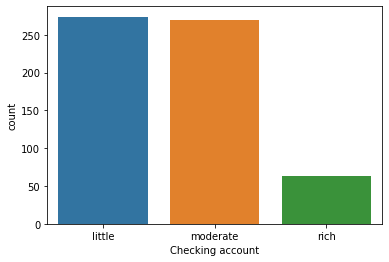

In [249]:
sns.countplot(gcd['Checking account']) #To Check distribution of variable
plt.show() 

The distribution of Checking account variable is shown. It can be seen that the distribution of little account is high followed by the moderate account and rich account.

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


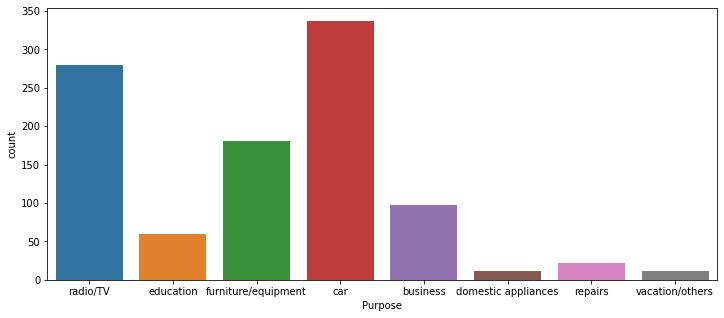

In [250]:
plt.figure(figsize=(12,5)) #To Check distribution of variable
sns.countplot(gcd['Purpose'])
plt.show()

The distribution of Purpose variable is shown. From the distribution it is clear that, more number of people are saving for the expense of car, fowllowed by radio/TV, furniture/equipment, business and education. Very few people are saving for domestic appliances, repairs and vacation/others.

##### Numerical Vs. Categorical Plot

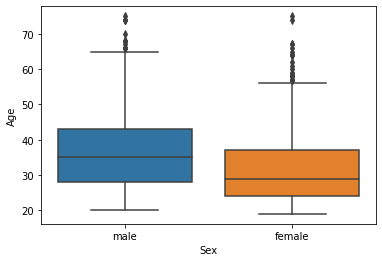

In [251]:
sns.boxplot(x=gcd['Sex'], y=gcd['Age']) #To compare Age and Sex variable
plt.show()

The boxplot between Age and Sex has been plotted. It can be seen that there are more males with varying age with accounts compared to the number of females with accounts.

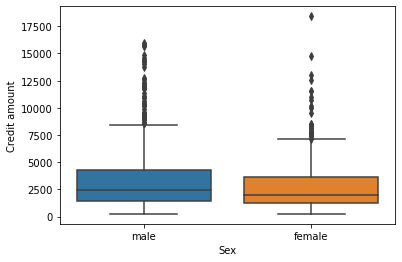

In [252]:
sns.boxplot(x=gcd['Sex'], y=gcd['Credit amount']) #To compare Credit Amount and Sex variable
plt.show()

The boxplot between Credit amount and Sex has been plotted. It can be seen that maleshas more varying credit amount as compared to the females.

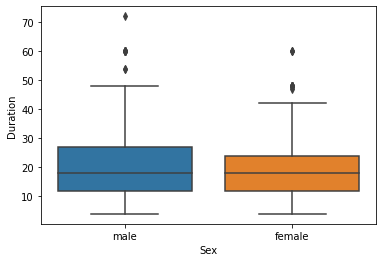

In [253]:
sns.boxplot(x=gcd['Sex'], y=gcd['Duration']) #To compare Duration and Sex variable
plt.show()

The boxplot between Duration and Sex has been plotted. It can be seen that males has more variation in the duration of months than the females.

##### Numerical Vs. Numerical Plot

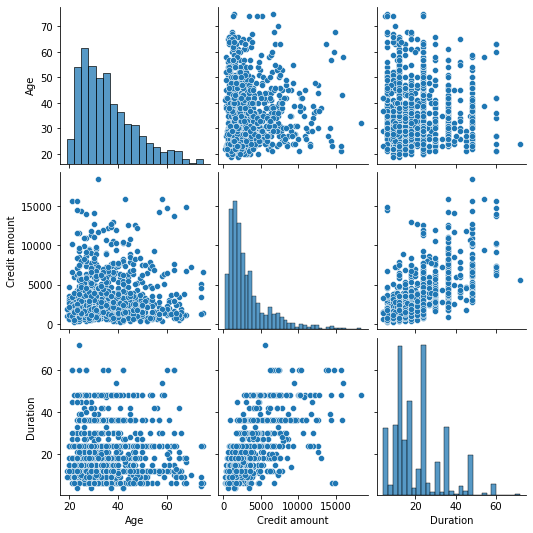

In [254]:
sns.pairplot(gcd.drop(['Unnamed: 0','Job'],axis=1)) #Plotting Numeric against numeric variable
plt.show()

The numeric against numeric plot has been plotted.

#### Age Vs. Credit amount
It can be seen that, in Age Vs. Credit amount plot, more number of people in all age are having credit amount less than 5000. Few people with age between 20 to 50 are having credit amount between 5000 to 10000. Very few people between age 25 to 45 are having Credit amount between 10000 to 15000. 
#### Age Vs. Duration
It can be seen that, in Age Vs. Duration plot, most of the people of age between 18 to 55  are having duration of their account between 0 to 40 months. Few people of age more than 55, having duration of their account between 0 to 30 months. Very few people of age between 20 to 60, having duration of their account between 45 to 60 months.
#### Credit amount Vs. Duration
It can be seen that, in Credit amount Vs. Duration plot, most of the account with Credit amount under 10000 has a duration less than 30 months. Some account with Credit amount between 2000 to 15000 has a duration between 35 to 45 months. Very few accounts with Credit amount between 5000 to 15000 has a duration between 50 to 60 months.

### Conclusion:
Around 350 people between age 25 to 45, has credit amount around 10000 with duration less than 30 months.